In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
df = pd.read_csv("IWBNetwork_6b6c_27b1_6573.csv")
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df.iloc[331371:]
df = df.drop(["time"], axis = 1)
# df = df.drop(["station_id"], axis = 1)
df = df.dropna()

In [5]:
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
#buoys = ['M2', 'M3', 'M4', 'M5','M6']

# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]

df.station_id.unique()

df = df.replace({ 'station_id': buoy_ident})

In [6]:
df.head()

,station_id,AtmosphericPressure,WindDirection,WindSpeed,Gust,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity
331372,5,1015.8,20,18,33,7,0.9,11.4,65
331373,1,1007.2,50,17,25,5.5,-1.1,10.3,62
331374,2,1009.4,30,17,25,5.7,-1.2,10.4,61
331375,3,1011.2,10,12,20,4.7,1.1,10.2,78
331376,5,1015.6,40,17,31,6.7,2.3,11.4,74


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.isnull().sum()

station_id             0
AtmosphericPressure    0
WindDirection          0
WindSpeed              0
Gust                   0
AirTemperature         0
DewPoint               0
SeaTemperature         0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train.shape, X_test.shape

((68427, 8), (17107, 8))

# Forward Selection

In [10]:
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [11]:
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=8,
                          scoring='r2')

In [12]:
sfs.k_feature_names_

('station_id',
 'AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Backward selection

In [13]:
sfsb = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [14]:
sfsb.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=8,
                          scoring='r2')

In [15]:
sfsb.k_feature_names_

('station_id',
 'AtmosphericPressure',
 'WindDirection',
 'WindSpeed',
 'Gust',
 'AirTemperature',
 'DewPoint',
 'SeaTemperature')

# Plot

In [16]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


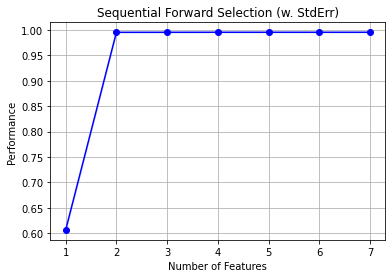

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [18]:
sfs2 = SFS(LinearRegression(),
         k_features=(3,7),
         forward=False,
         floating=False,
         cv=0)
sfs2.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(3, 7))

c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\chitransh\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


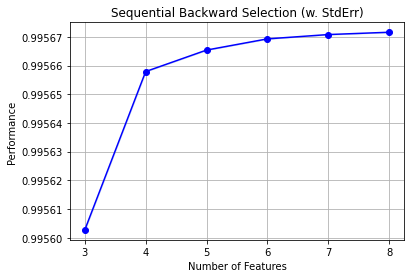

In [19]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()